# Метод распространения меток (LPA)

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 3: Выделение сообществ"
* Документация:
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.label_propagation.label_propagation_communities.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_numpy_array.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.density.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.partition_quality.html

## Вопросы для совместного обсуждения

1\. Обсудите принцип работы LPA и реализацию этого алгоритма в `networkx.`

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Загрузите граф карате-клуба и выделите в нем сообщества с помощью реализации алгоритма распространения меток из `networkx`.
Визуализируйте полученный результат. Для визуализации выберите несколько цветов (в соответствии с количеством выделенных сообществ) и раскрасьте узлы и связи в рамках одного сообщества этими цветами. Связи между узлами, состоящими в разных сообществах, отрисуйте черным цветом.

- [x] Проверено на семинаре

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.karate_club_graph()
communities = nx.community.label_propagation_communities(G)
communities

dict_values([{0, 1, 3, 4, 7, 10, 11, 12, 13, 17, 19, 21, 24, 25, 31}, {32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30}, {16, 5, 6}])

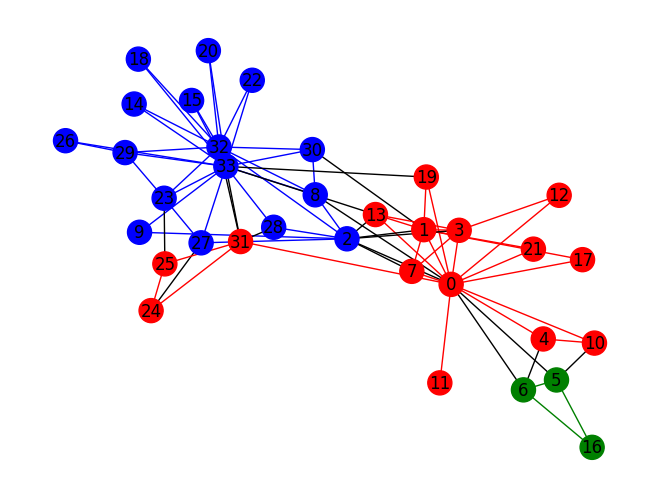

In [ ]:
pos = nx.spring_layout(G)
colors = ['r', 'b', 'g']
color_map = []
for node in G.nodes:
    for i, community in enumerate(communities):
        if node in community:
            color_map.append(colors[i % len(colors)])
edge_colors = []
for u, v in G.edges():
    if (u in list(list(communities)[0]) and v in list(list(communities)[0])):
        edge_colors.append('r')
    elif (u in list(list(communities)[1]) and v in list(list(communities)[1])):
        edge_colors.append('b')
    elif (u in list(list(communities)[2]) and v in list(list(communities)[2])):
        edge_colors.append('g')
    else:
        edge_colors.append('k')
nx.draw(G, pos, node_color=color_map, edge_color=edge_colors, with_labels=True)
plt.show()

<p class="task" id="2"></p>

2\. Реализуйте синхронный алгоритм распространения меток. В синхронном варианте алгоритма для выбора новой метки узла используются метки соседей с предыдущей итерации. Если среди меток соседей есть несколько вариантов с одинаковой максимальной частотой, то метка выбирается случайным образом. Алгоритм прекращает работу, когда на очередной итерации не была изменена метка ни одного узла. Визуализируйте пошаговую динамику распространения меток и итоговое разбиение сети аналогично предыдущей задаче.

- [ ] Проверено на семинаре

<p class="task" id="3"></p>

3\. Реализуйте асинхронный алгоритм распространения меток. В асинхронном варианте алгоритма для выбора новой метки узла используются в том числе метки соседей с текущей итерации алгоритма. Визуализируйте пошаговую динамику распространения меток и итоговое разбиение сети аналогично предыдущей задаче.

- [ ] Проверено на семинаре

<p class="task" id="4"></p>

4\. Используя собственную реализацию LPA, разбейте граф карате-клуба на сообщества `N=10` раз. Создайте двумерный массив `freqs` размера `MxM` (`M` - количество узлов в графе), где `freqs[i, j]` показывает, как часто узлы `i` и `j` оказывались в одном сообществе.

Создайте граф, в котором между узлами `i` и `j` существует связь только тогда, когда `freqs[i, j] >= 8`. Получите компоненты связности данного графа. Интерпретируя данные компоненты связности как сообщества в исходном графе, визуализируйте полученное разбиение карате-клуба (оригинального графа) аналогично предыдущим заданиям.


- [ ] Проверено на семинаре

<p class="task" id="5"></p>

5\. Оформите результаты работы алгоритмов в виде таблицы

| Алгоритм                      | Средняя плотность сообществ | Модулярность | Покрытие | Эффективность |
|-------------------------------|-----------------------------|--------------|----------|----------|
| Синхронный LPA             |                             |              |          |          |
| Асинхронный LPA                     |                             |              |          |          |
| Множественный LPA                     |                             |              |          |          |

Для представления данных в табличном виде используйте `pandas`.  Все расчеты метрик при решении этой задачи выполните повторно.

- [ ] Проверено на семинаре